# Objetivo
Realizar a implementação de uma arquitetura rede CNN da sua preferência utilizando Keras/TensorFlow.

*   Pode ser um script python ou notebook (.py ou .ipynb)
*   Taxa de acerto de pelo menos 85%.
*   Apresentar os gráficos de acurácia e Loss durante treinamento e validação
*   A saída do seu código deve carregar um set de imagens diferentes das utilizadas no treinamento, exibir a imagem e classificar entre humano ou cavalo.



In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [4]:
train_horse = os.path.join('/tmp/horse-or-human/horses')
train_human = os.path.join('/tmp/horse-or-human/humans')

valid_horse = os.path.join('/tmp/validation-horse-or-human/horses')
valid_human = os.path.join('/tmp/validation-horse-or-human/humans')


In [5]:
train_horse_N = os.listdir(train_horse)
print(train_horse_N[:10])

train_human_N = os.listdir(train_human)
print(train_human_N[:10])

valid_horse_N = os.listdir(valid_horse)
print(valid_horse_N[:10])

valid_human_N = os.listdir(valid_human)
print(valid_human_N[:10])

['horse22-0.png', 'horse22-2.png', 'horse14-6.png', 'horse21-7.png', 'horse35-3.png', 'horse31-2.png', 'horse33-3.png', 'horse26-3.png', 'horse08-4.png', 'horse24-4.png']
['human04-19.png', 'human07-24.png', 'human10-08.png', 'human14-05.png', 'human14-24.png', 'human11-13.png', 'human04-05.png', 'human10-07.png', 'human03-23.png', 'human12-07.png']
['horse5-018.png', 'horse2-412.png', 'horse1-568.png', 'horse6-064.png', 'horse5-100.png', 'horse6-089.png', 'horse2-224.png', 'horse3-011.png', 'horse4-530.png', 'horse1-127.png']
['valhuman03-10.png', 'valhuman05-06.png', 'valhuman04-19.png', 'valhuman01-10.png', 'valhuman02-01.png', 'valhuman02-20.png', 'valhuman04-06.png', 'valhuman02-04.png', 'valhuman01-07.png', 'valhuman05-21.png']


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

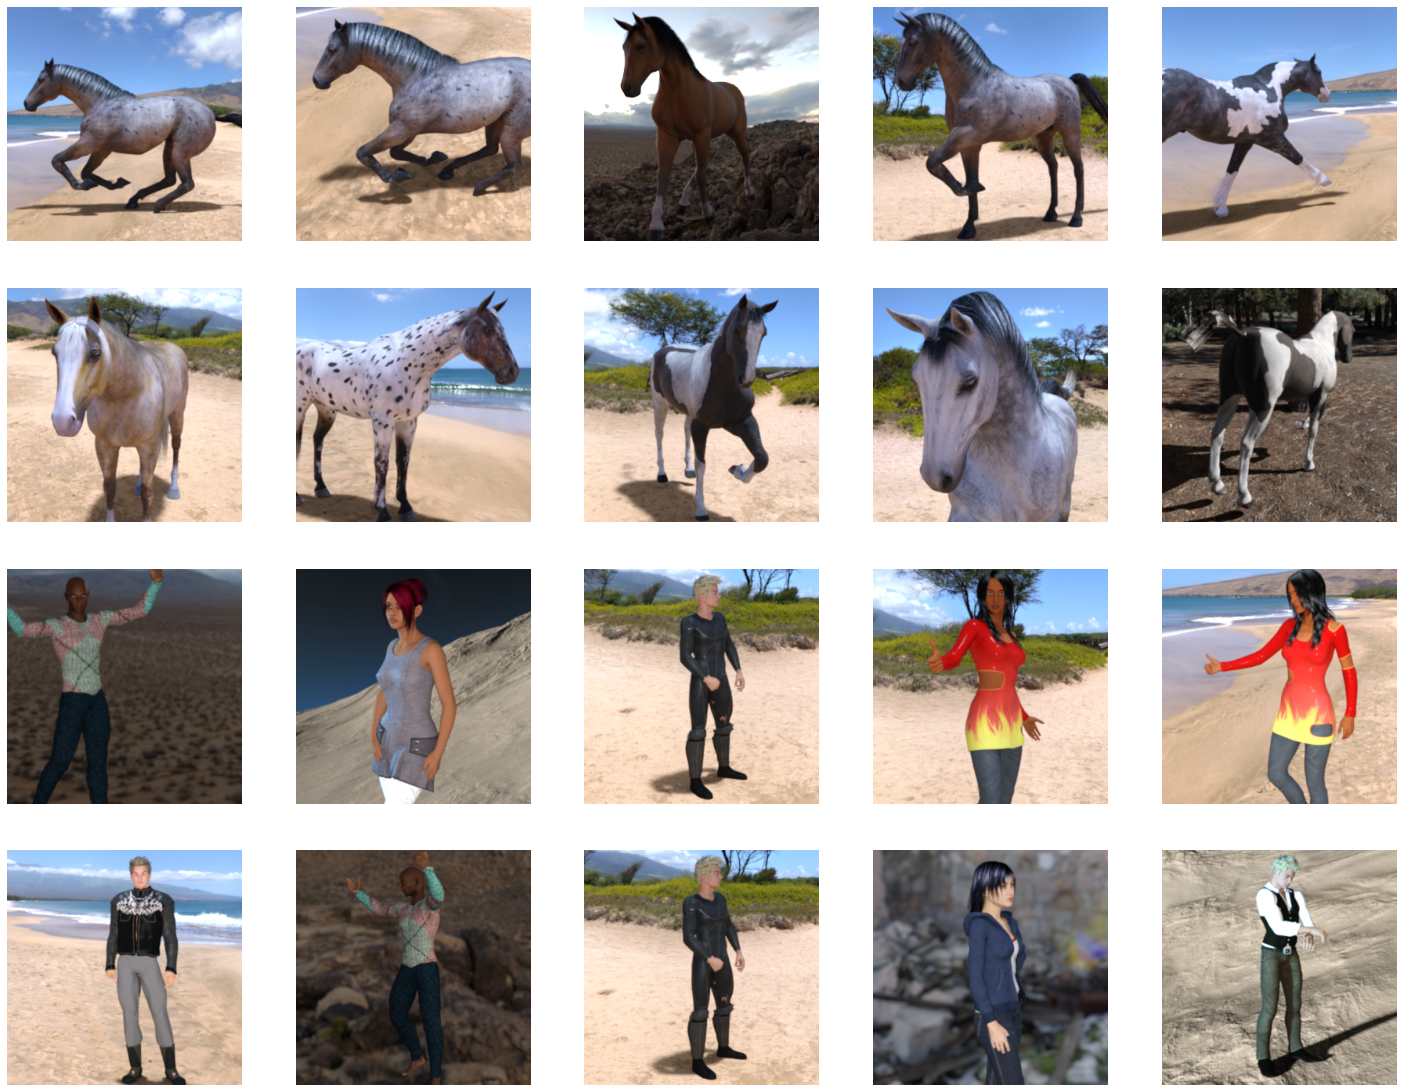

In [7]:
import matplotlib.image as mpimg

n_rows = 5
n_columns = 5

pic_ind = 0

fig = plt.gcf()
fig.set_size_inches(n_columns*5, n_rows*5)


horse_pic = [os.path.join(train_horse, fname) for fname in train_horse_N[pic_ind:pic_ind+10]]
human_pic = [os.path.join(train_human, fname) for fname in train_human_N[pic_ind:pic_ind+10]]

for i, img_path in enumerate(horse_pic+human_pic):
  plt.subplot(n_rows, n_columns, i+1)
  plt.axis(False)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu, 
                             input_shape=(300, 300, 3)), tf.keras.layers.MaxPool2D(2, 2),
                             
                             tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
    
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dataG = ImageDataGenerator(1/255)
valid_dataG = ImageDataGenerator(1/255)

train_G = train_dataG.flow_from_directory('/tmp/horse-or-human',
                                                    target_size=(300, 300),
                                                    batch_size=128,
                                                    class_mode='binary')

valid_G = valid_dataG.flow_from_directory('/tmp/validation-horse-or-human',
                                                              target_size=(300, 300),
                                                              batch_size=32,
                                                              class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [11]:
#Taxa de acerto
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.15):
      print("\nAlcançou 85% de accuracy!")
      self.model.stop_training = True

callbacks = myCallback()

In [12]:
history = model.fit(
    train_G,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=valid_G,
    validation_steps=8,
    callbacks=[callbacks]
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
8/8 [==============================] - 24s 1s/step - loss: 13.3152 - accuracy: 0.5384 - val_loss: 0.6340 - val_accuracy: 0.5781
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 0.7934 - accuracy: 0.5451 - val_loss: 0.2951 - val_accuracy: 0.8867
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.3321 - accuracy: 0.8652 - val_loss: 0.2565 - val_accuracy: 0.8984
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 2.0894 - accuracy: 0.6374 - val_loss: 1.3669 - val_accuracy: 0.5273
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 2.3608 - accuracy: 0.5762 - val_loss: 4.4416 - val_accuracy: 0.5000
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.6379 - accuracy: 0.7553 - val_loss: 3.5450 - val_accuracy: 0.6133
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.2402 - accuracy: 0.8910 - val_loss: 1.9027 - val_accuracy: 0.7930
Epoch 8/15
8/8 [=======================

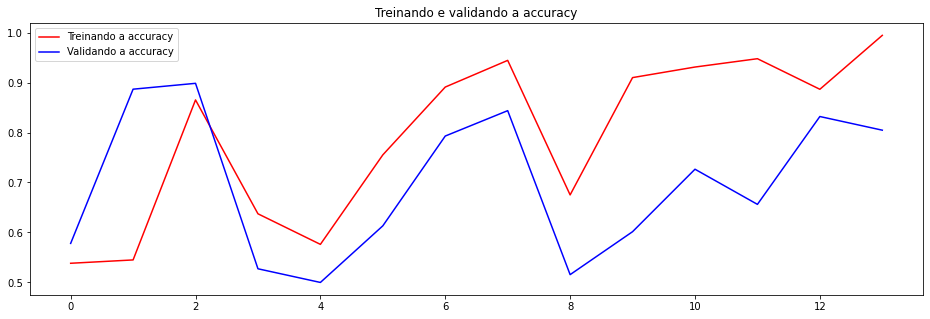

<Figure size 432x288 with 0 Axes>

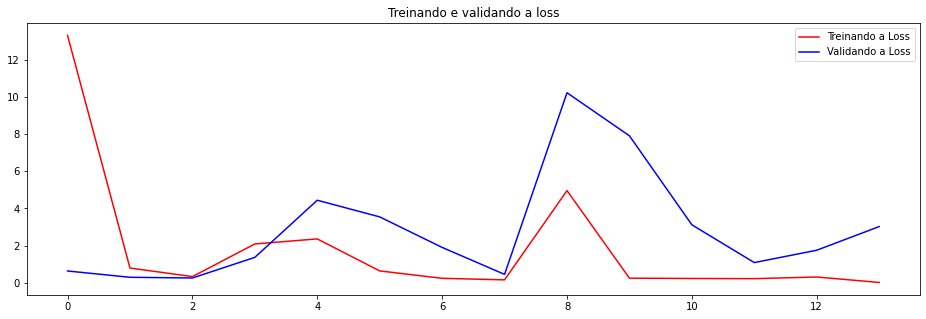

In [14]:
#Acuracia e loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16, 5))
plt.plot(epochs, acc, 'r', label='Treinando a accuracy')
plt.plot(epochs, val_acc, 'b', label='Validando a accuracy')
plt.title('Treinando e validando a accuracy')
plt.legend()
plt.figure()

plt.figure(figsize=(16, 5))
plt.plot(epochs, loss, 'r', label='Treinando a Loss')
plt.plot(epochs, val_loss, 'b', label='Validando a Loss')
plt.title('Treinando e validando a loss')
plt.legend()

plt.show()

Saving pessoa2.jpg to pessoa2.jpg


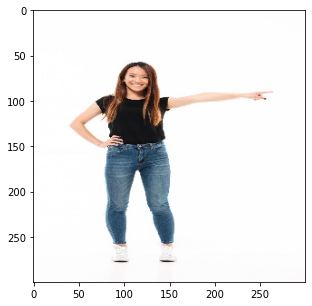

pessoa2.jpg é um humano


In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()


for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn 
  img = image.load_img(path, target_size=(300, 300))
  plt.figure(figsize=(5, 5))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #print(classes[0])
  if classes[0]>0.5:
    print(fn+' é um humano')
  else:
    print(fn+' é um cavalo')